# CNN 02 - Forward/backward propagation
Last updated: 21.11.14
Written by Jinseok Moon

In [45]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [135]:
import numpy as np

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

# Input layer
x_input = np.array([2, 4])  # x1, x2
y_true = np.array([0.8, 0.4])  # y1. y2: ground truth
x = x_input.reshape(-1)

# First layer
w1 = np.array([0.7, 0.3]) # w11, w21
w2 = np.array([0.2, 0.4]) # w12, w22

W_1 = np.array([w1, w2])
g = np.dot(W, x)
h = sigmoid(g)

print("g =",g) # g = [2.6 2. ]
print("h =", h) # h = [0.93086158 0.88079708]

g = [2.6 2. ]
h = [0.93086158 0.88079708]


In [67]:
# Second layer

w3 = np.array([0.1, 0.5]) # w31, w41
w4 = np.array([0.8, 0.4]) # w32, w42

W_2 = np.array([w3, w4])
z = np.dot(W_2, h)
t = sigmoid(z)
y_predict = t  # [y1p, y2p]

print("z =", z) # g2 = [0.5334847  1.09700809]
print("t =", t) # t = [0.63029549 0.74969909]

z = [0.5334847  1.09700809]
t = [0.63029549 0.74969909]


\begin{equation}\label{eqn:eq1}
\begin{split}
g_1(x) &=  \sum^{n}_{i} x_iw_i + b = W_1^Tx \\[5pt]
    &= \left( \begin{matrix}  w_{11} & w_{21} \newline w_{12} & w_{22} \end{matrix} \right) \left( \begin{matrix}  x_{1} \newline x_{2} \end{matrix} \right)
\end{split}
\end{equation}

이번에는 활성화 함수로 계단함수가 아닌 sigmoid function $\sigma(x)$를 이용한다.

\begin{align}
\label{eqn:eq2} h(x) &= \sigma(x) = {1 \over 1 + e^{-x}} \\[5pt]
\label{eqn:eq3} \hat{y} &= h(x)
\end{align}

최종 계산해보면, $\hat{y_1}=0.630, \hat{y_2}=0.750$을 얻을 수 있다. 실제 $y_1=0.8, y_2=0.4$라고 가정했을 때, 퍼셉트론에서 예측한 값과 오차가 발생하게 된다.

## 비용함수 (Cost function)
우리는 퍼셉트론의 순전파/역전파를 이용해서 가중치들을 조정해 줄 것이다. 그리고 이 때 필요한 것이 바로 비용함수와 미분이다.
$\sigma(x)$의 미분은 $\sigma(x)(1-\sigma(x)$)로 나타낼 수 있다. 유도식은 추후 추가.
비용함수는 C는 아래와 같이 정의한다. 

\begin{align}
\label{eqn:eq1} C &= {1 \over 2} \left[(y_1 - t_1)^2 + (y_2 - t_2)^2\right]  \\[5pt]
\label{eqn:eq2} \frac{\partial C}{\partial t_1} &= y_1-t_1, \qquad \frac{\partial C}{\partial t_2} = y_2-t_2 
\end{align}

\begin{equation}\label{eqn:eq3}
\begin{split}
z &= W_2^T h, & {dz \over dW_2}&= h\\[5pt]
\left( \begin{matrix}  z_{1} \newline z_{2} \end{matrix} \right)  &=  \left( \begin{matrix}  w_{31} & w_{41} \newline w_{32} & w_{42} \end{matrix} \right) \left( \begin{matrix}  h_{1} \newline h_{2} \end{matrix} \right) \\[5pt]
z_1 &= w_{31}h_1 + w_{41}h_2 \\[5pt]
z_2 &= w_{32}h_1 + w_{42}h_2 \\[5pt]
{dz_1 \over dw_{31}}&= h_1, \enspace {dz_1 \over dw_{41}}= h_2 \\[5pt]
{dz_2 \over dw_{32}}&= h_1, \enspace {dz_1 \over dw_{42}}= h_2 \\[5pt]
\end{split}
\end{equation}

이번에는 활성화 함수로 계단함수가 아닌 sigmoid function $\sigma(x)$를 이용한다.

\begin{align}
\label{eqn:eq4} h(x) &= \sigma(x) = {1 \over 1 + e^{-x}} \\[5pt]
\label{eqn:eq5} \hat{y} &= h(x)
\end{align}




In [166]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

def GetCost(y_true, y_predict):
    cost = 1/2*(y_predict-y_true)**2
    return cost

def GetGradient(x, y, W1, W2, learning_rate=0.05, epoch=100, return_cost=False):
    errlst = []

    for epochs in range(epoch):
        g = np.dot(W1, x)
        h = sigmoid(g)
        
        z = np.dot(W2, h)
        t = sigmoid(z)
        
        cost = GetCost(y, t)
        dCdt = t-y # dCdt1, dCdt2
        dtdz = sigmoid(z)*(1-sigmoid(z)) # dt1dz1, dt2dz2
        
        dz1dh1 = W2[0][0]
        dz1dh2 = W2[0][1]
        dz2dh1 = W2[1][0]
        dz2dh2 = W2[1][1]
        
        dz1dw31 = h[0]
        dz1dw41 = h[1]
        dz2dw32 = h[0]
        dz2dw42 = h[1]
        
        dCdw31 = dCdt[0]*dtdz[0]*dz1dw31
        dCdw41 = dCdt[0]*dtdz[0]*dz1dw41
        dCdw32 = dCdt[1]*dtdz[1]*dz2dw32
        dCdw42 = dCdt[1]*dtdz[1]*dz2dw42
        
        dCdh1 = dCdt[0]*dtdz[0]*dz1dh1 + dCdt[1]*dtdz[1]*dz2dh1
        dCdh2 = dCdt[0]*dtdz[0]*dz1dh2 + dCdt[1]*dtdz[1]*dz2dh2
        
        dhdg = sigmoid(g)*(1-sigmoid(g)) # dh1dg1, dh2dg2
        
        dg1dw11 = x[0]
        dg1dw21 = x[1]
        dg2dw12 = x[0]
        dg2dw22 = x[1]
        
        dCdw11 = dCdh1*dhdg[0]*dg1dw11
        dCdw21 = dCdh1*dhdg[0]*dg1dw21
        dCdw12 = dCdh2*dhdg[1]*dg2dw12
        dCdw22 = dCdh2*dhdg[1]*dg2dw22
        
        W1[0][0] -= learning_rate*dCdw11
        W1[0][1] -= learning_rate*dCdw21
        W1[1][0] -= learning_rate*dCdw12
        W1[1][1] -= learning_rate*dCdw22
        
        W2[0][0] -= learning_rate*dCdw31
        W2[0][1] -= learning_rate*dCdw41
        W2[1][0] -= learning_rate*dCdw32
        W2[1][1] -= learning_rate*dCdw42
        if return_cost==True:
            errlst.append(np.sum(cost))
        print("Epoch: [{0}/{1}], predict: {2}, Cost: {3}".format(epochs, epoch,t ,  np.sum(cost)))
    if return_cost==True:
        return errlst
    else:
        return 

In [168]:
# Input layer
x_input = np.array([2, 4])  # x1, x2
y_true = np.array([0.8, 0.4])  # y1. y2: ground truth
x = x_input.reshape(-1)

# First layer
w1 = np.array([0.7, 0.3]) # w11, w21
w2 = np.array([0.2, 0.4]) # w12, w22

W_1 = np.array([w1, w2])

w3 = np.array([0.1, 0.5]) # w31, w41
w4 = np.array([0.8, 0.4]) # w32, w42

W_2 = np.array([w3, w4])

errlst = GetGradient(x, y_true, W_1, W_2, learning_rate=0.3, return_cost=True)

Epoch: [0/100], predict: [0.63029549 0.74969909], Cost: 0.07554453738003918
Epoch: [1/100], predict: [0.63474189 0.74337071], Cost: 0.07260684328278962
Epoch: [2/100], predict: [0.63902103 0.73697141], Cost: 0.06973198150469195
Epoch: [3/100], predict: [0.64314166 0.73051004], Cost: 0.06692071360483501
Epoch: [4/100], predict: [0.64711211 0.72399582], Cost: 0.0641740013901004
Epoch: [5/100], predict: [0.65094026 0.71743831], Cost: 0.061492943713737286
Epoch: [6/100], predict: [0.65463358 0.71084729], Cost: 0.05887871661051838
Epoch: [7/100], predict: [0.65819911 0.70423271], Cost: 0.05633251763213302
Epoch: [8/100], predict: [0.66164345 0.69760459], Cost: 0.0538555151119816
Epoch: [9/100], predict: [0.66497283 0.69097297], Cost: 0.05144880293878543
Epoch: [10/100], predict: [0.66819307 0.68434777], Cost: 0.0491133612581857
Epoch: [11/100], predict: [0.67130964 0.67773879], Cost: 0.04685002335666762
Epoch: [12/100], predict: [0.67432762 0.67115558], Cost: 0.044659448819079836
Epoch: [13

In [163]:
import matplotlib.pyplot as plt

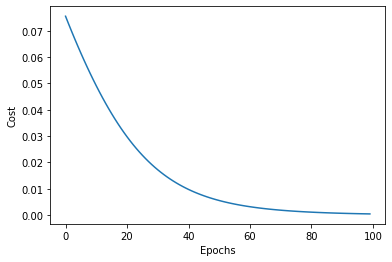

In [169]:
plt.plot(errlst)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.show()

## References
[<sup id="fn1">1</sup>](#fn1-back) 선형대수와 통계학으로 배우는 머신러닝 with Python. https://github.com/bjpublic/MachineLearning